In [2]:
!pip install covid

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 11.0 MB 4.6 MB/s            
     |████████████████████████████████| 97 kB 10.1 MB/s            
     |████████████████████████████████| 97 kB 6.1 MB/s             
  Created wheel for covid: filename=covid-2.5.2-py3-none-any.whl size=10400 sha256=ec5c6d210d8d1f74d099c29e6df5fadf813caedd3c9ab05f799881dcc3a3439b
  Stored in directory: /home/jovyan/.cache/pip/wheels/99/53/62/8288ea622fadc924c952a7ead7350319cf64c9afd8b05bb4d1
Successfully built covid


## КМ4
1. Загрузите актуальные данные университета по эпидемии Covid-19 и сконструируйте из них Pandas DataFrame. Выясните, для каких стран доступны данные. Составьте упорядоченный по убыванию список стран, где число смертей на миллион жителей больше или равен данным по России. Постройте для этого DataFrame. Визуализируйте данные. Попытайтесь выяснить корреляцию между смертностью на миллион жителей и уровнем прививок по странам.
2. Средствами SymPy вычислите интеграл $\int_1^\infty \frac{1}{(ax)^3}dx$, нарисуйте график зависимости значения интеграла от 𝑎 на отрезке [1,2].

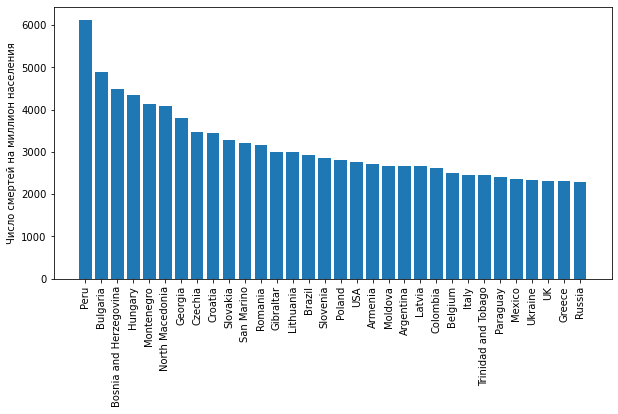

In [10]:
import covid
import pandas as pd
import matplotlib.pyplot as plt

covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world)
not_country = ('North America', 'Asia', 'South America', 'Europe', 'Africa', 'World', 'South Africa')
excluded = df[~df.country.isin(not_country)]
df_rus = excluded.where(excluded.country == 'Russia').dropna()
new_df = excluded.loc[excluded['total_deaths_per_million'] >= int(df_rus.total_deaths_per_million.item())]
new_df = new_df.sort_values(by='total_deaths_per_million', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(new_df.country, new_df.total_deaths_per_million)
plt.xticks(rotation=90)
plt.ylabel('Число смертей на миллион населения')
plt.show()

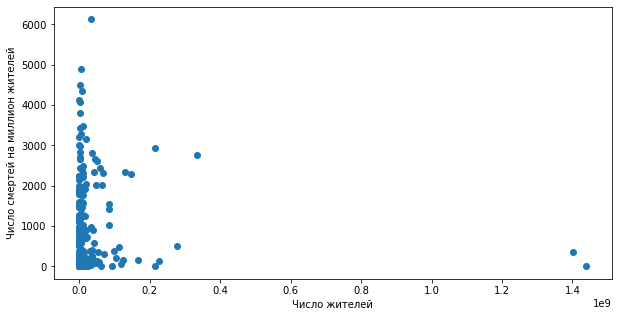

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(excluded.population, excluded.total_deaths_per_million)
plt.xlabel('Число жителей')
plt.ylabel('Число смертей на миллион жителей')
plt.show()

 1  
────
   3
2⋅a 


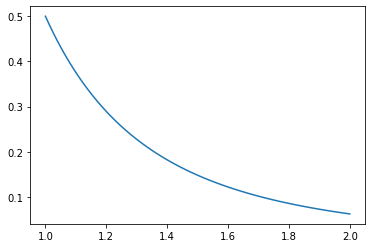

In [22]:
import numpy as np
from sympy import symbols, integrate, oo, Eq, init_printing, lambdify, pretty_print
init_printing()


def main(integ):
    aa = np.linspace(1, 2, 100)
    x = lambdify(a, integ, 'numpy')(aa)
    pretty_print(integ)
    plt.plot(aa, x)
    plt.show()


x = symbols('x')
a = symbols('a')
integrand = 1 / ((a*x)**3)
integ = integrate(integrand, (x, 1, oo))
main(integ)